### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

### Part I - Importing the Dataset

In [2]:
df = pd.read_csv('Mall_Customers2.csv')
df.head()

,Unnamed: 0,CustomerID,Gender,Age,Income,Spending Score,Clusters
0,0,1,Male,19,15,39,3
1,1,2,Male,21,15,81,2
2,2,3,Female,20,16,6,3
3,3,4,Female,23,16,77,2
4,4,5,Female,31,17,40,3


In [3]:
# Store the dataset as numpy
np_arr = df.values

# Select the features and target
features = np_arr[:, [4, 5]]
target = np_arr[:, 6].astype(int)

#Print the class labels of the target values.
print(type(target))
print("Class labels:", np.unique(target))

<class 'numpy.ndarray'>
Class labels: [0 1 2 3 4]


### Part II - Training the Perceptron

In [4]:
# Spliting the dataset to training and test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1, stratify=target)

print("Labels count in y_train: ", np.bincount(y_train))
print("Labels count in y_test: ", np.bincount(y_test))

Labels count in y_train:  [57 27 15 16 25]
Labels count in y_test:  [24 12  7  7 10]


In [5]:
# Feature scaling
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
# Training the Perceptron
ppn = Perceptron(n_iter_no_change=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, n_iter_no_change=40, random_state=1)

### Part III - Evaluate the Perceptron Mode

In [7]:
# Misclasified samples count
y_pred = ppn.predict(X_test_std)
print("Misclassified samples: %d" % (y_test != y_pred).sum())

Misclassified samples: 3


In [8]:
# Accuracy of the Perceptron model
print("Accuracy (predictions): %.2f" % accuracy_score(y_test, y_pred))
print("Accuracy: %.2f" % ppn.score(X_test_std, y_test))

Accuracy (predictions): 0.95
Accuracy: 0.95


### Part IV - Plotting the decision regions and the Data

In [9]:
# Plot decision regions
def plot_decision_regions(X, y, classifier, test_samples, resolution=0.02):

    # Setup marker generator and colormap
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Create a mesh grid for the colormap plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution), np.arange(y_min, y_max, resolution))

    # Predict class labels for each point in the mesh grid
    Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx],
                    label=cl, edgecolor='black')
    
    # Highlight test samples
    plt.scatter(test_samples[:, 0], test_samples[:, 1], c='None', edgecolor='black', alpha=1.0,linewidth=1,
                marker='o', s=100, label='test set')

C:\Users\Barcenilla\AppData\Local\Temp\ipykernel_5228\485634579.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx],


<function matplotlib.pyplot.show(close=None, block=None)>

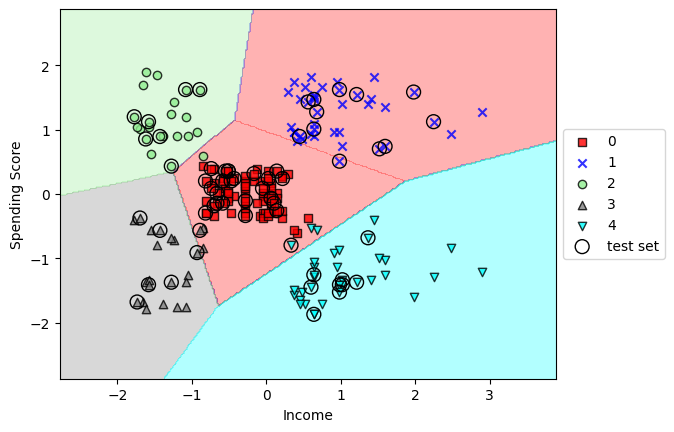

In [10]:
# Initialize variables
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Plotting the decision regions
plot_decision_regions(X_combined_std, y_combined, ppn, X_test_std)
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show